In [112]:
#Importing libraries
import numpy as np
import pandas as pd
import math

In [113]:
#reading data file
filename = 'abc.txt'
data = np.loadtxt(filename,delimiter='\t')

In [114]:
#Separating X and Y columns
x0 = data[0:,0]
y0 = data[0:,1]

In [119]:
#College requirements
print('x\ty\tY=log(y)\tXY\tX^2')

ln_x = np.log(x0)
ln_y = np.log(y0)
XY = x*ln_y
Xr2 = x**2

#Actual calculations
x = np.sum(x0)
y = np.sum(y0)
ly = np.sum(ln_y)
xy = np.sum(XY)
xr2 = np.sum(Xr2)
no = x0.shape[0]

temp1 = [x,y,ly,xy,xr2]
temp1_ = np.array(temp1)

#Table required for college
temp = [x0,y0,ln_y,XY,Xr2]
df = np.transpose(np.array(temp))
df = np.vstack((df,temp1))
print(pd.DataFrame(df))
#print('\nLast line is sum')



x	y	Y=log(y)	XY	X^2
     0       1         2         3     4
0  0.0  2.0000  0.693147  0.000000   0.0
1  1.0  2.2103  0.793128  0.793128   1.0
2  2.0  2.4428  0.893145  1.786290   4.0
3  3.0  2.6997  0.993141  2.979422   9.0
4  6.0  9.3528  3.372561  5.558840  14.0


<ipython-input-119-2e1cbbad246e>:4: RuntimeWarning: divide by zero encountered in log
  ln_x = np.log(x0)


In [116]:
#Guass elimination
n = 2

# Making numpy array of n x n+1 size and initializing 
# to zero for storing augmented matrix
a = np.zeros((n,n+1))

# Making numpy array of n size and initializing 
# to zero for storing solution vector
root = np.zeros(n)

a[0][0]=x
a[0][1]=no
a[0][2]=ly
a[1][0]=xr2
a[1][1]=x
a[1][2]=xy

#print(a)

# Applying Gauss Elimination
for i in range(n):
    if a[i][i] == 0.0:
        print('Divide by zero detected!')
        break

    for j in range(i+1, n):
        ratio = a[j][i]/a[i][i]

        for k in range(n+1):
            a[j][k] = a[j][k] - ratio * a[i][k]

# Back Substitution
root[n-1] = a[n-1][n]/a[n-1][n-1]

for i in range(n-2,-1,-1):
    root[i] = a[i][n]

    for j in range(i+1,n):
        root[i] = root[i] - a[i][j]*root[j]

    root[i] = root[i]/a[i][i]

In [117]:
#results
print('a\' = %0.5f \nb\' = %0.5f' %(root[1],root[0]))
print('\na = %0.5f \nb = %0.5f' %(math.exp(root[1]),root[0]))
print('\ny = Aexp(bx)')
print('y = %0.5f exp(%0.5fx)' %(math.exp(root[1]),root[0]))

#print(root)

a' = 0.00000 
b' = 0.56209

a = 1.00000 
b = 0.56209

y = Aexp(bx)
y = 1.00000 exp(0.56209x)


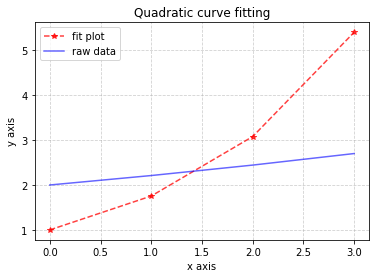

<Figure size 20000x10000 with 0 Axes>

In [118]:
from matplotlib import pyplot as plt

x = np.linspace(x0[0],x0[x0.shape[0]-1],x0.shape[0])
#y = root[0]*x + root[1]
y = math.exp(root[1])*2.7182818284590452353602874713527**(root[0]*x)

plt.plot(x, y,'r*--',alpha = 0.75,label = 'fit plot')
plt.plot(x0,y0,'b-',alpha = 0.6, label = 'raw data')

plt.title('Quadratic curve fitting')
plt.xlabel('x axis') 
plt.ylabel('y axis') 
plt.grid(alpha =.6, linestyle ='--')
plt.legend()
plt.figure(figsize=(20,10),dpi=1000)

plt.show()